1. Les colonnes ont été ajoutées, vous pouvez ajouter des appartements via l'interface.
2. Vous trouverez le dataset original, à la racine du projet, il est nommé "apartment_save.csv"
3. Utilisation Numpy et Panda ci-dessous

In [124]:
# Importation des dépendances nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [125]:
# Chargement du ficher CSV
data = pd.read_csv("./apartment.csv")

In [127]:
print("Pour la surface")
surfaceMean = data['surface'].mean()
print("Moyenne : {0}".format(surfaceMean))
surfaceStd = data['surface'].std()
print("Écart type : {0}".format(surfaceStd))
surfaceMin = data['surface'].min()
print("Surface minimum : {0}".format(surfaceMin))
surfaceMax = data['surface'].max()
print("Surface maximum : {0}".format(surfaceMax))

print("\nPour l'année")
yearMean = data['year'].mean()
print("Moyenne : {0}".format(yearMean))
yearMin = data['year'].min()
print("Année la plus vieille : {0}".format(yearMin))
yearMax = data['year'].max()
print("Année la plus récente : {0}".format(yearMax))

print("\nPour les balcons")
apartment_with_balcony = data['balcony'].mean()
print(f"Proportion d'appartements avec balcon : {apartment_with_balcony:.2%}")

print("\nComptage du nombre d'appartements dans chaque catégorie de prix")
priceCategoryCounts = data['priceCategory'].value_counts()
print(priceCategoryCounts)

print("\nPour le nombre de chambre")
nbRoomsMean = data['nbRooms'].mean()
print("Moyenne : {0}".format(nbRoomsMean))
nbRoomsMedian = data['nbRooms'].median()
print("Médiane : {0}".format(nbRoomsMedian))
nbRoomsVariance = data['nbRooms'].var()
print("Variance : {0}".format(nbRoomsVariance))
nbRoomsStd = data['nbRooms'].std()
print("Écart type : {0}".format(nbRoomsStd))

Pour la surface
Moyenne : 317.02
Écart type : 170.5331497144035
Surface minimum : 7
Surface maximum : 599

Pour l'année
Moyenne : 2015.23
Année la plus vieille : 2005
Année la plus récente : 2024

Pour les balcons
Proportion d'appartements avec balcon : 50.00%

Comptage du nombre d'appartements dans chaque catégorie de prix
priceCategory
scam      48
low       18
high      17
normal    17
Name: count, dtype: int64

Pour le nombre de chambre
Moyenne : 56.49
Médiane : 61.5
Variance : 892.7170707070708
Écart type : 29.87837128605023


Avec Matplot : Créer un Diagramme à barres pour afficher la répartition des catégories de prix (par exemple, combien d'appartements sont "low", "normal", "high", "scam").


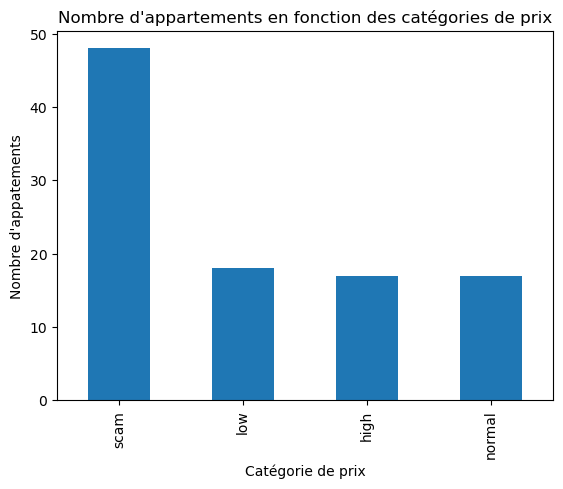

In [128]:
print("Avec Matplot : Créer un Diagramme à barres pour afficher la répartition des catégories de prix (par exemple, combien d'appartements sont \"low\", \"normal\", \"high\", \"scam\").")

plt.figure()
priceCategoryCounts.plot(kind='bar')

plt.title('Nombre d\'appartements en fonction des catégories de prix')
plt.xlabel('Catégorie de prix')
plt.ylabel('Nombre d\'appatements')

plt.show()

Bonus : Créer un Heatmap pour voir la correlation entre Année de construction et prix afin de voir si les appartements plus récents ont tendance à être plus chers.


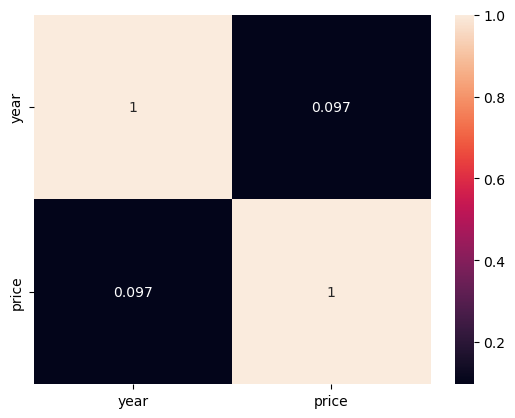

In [129]:
print("Bonus : Créer un Heatmap pour voir la correlation entre Année de construction et prix afin de voir si les appartements plus récents ont tendance à être plus chers.")

correlationYearPrice = data[['year', 'price']].corr()

plt.figure()
seaborn.heatmap(correlationYearPrice, annot=True)
plt.show()

4. La nouvelle colonne ville dans le dataset avec les possiblités Lyon, Paris ou Marseille a été ajouté

5. Créer une prédiction par regression linéaire sur la note en fonction de la ville, de la surface et du prix

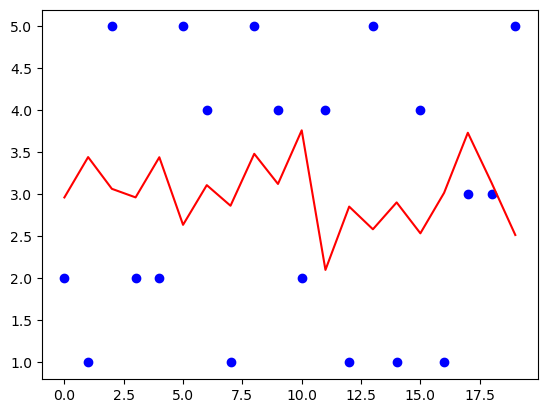

In [131]:
le = LabelEncoder()
data['city'] = le.fit_transform(data['city'])

X = data[['city', 'surface', 'price']]
y = data['note']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure()

# Tracer les points réels
plt.scatter(range(len(y_test)), y_test, color='blue', label='Données réelles')

# Tracer les prédictions
plt.plot(range(len(y_pred)), y_pred, color='red', label='Régression linéaire')

plt.show()

6. Créer une prédiction par regression linéaire sur l'année en fonction de la ville puis donnéer sa propabilité (R2) et son taux d'erreur en année (RSME ou MSE)

R² : -0.040712369991610764
MSE : 33.365238581931045
RMSE : 5.776265106617861


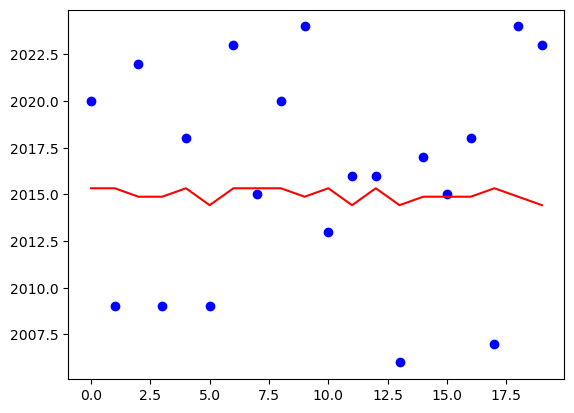

In [132]:
X = data[['city']]
y = data['year']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R² : {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"MSE : {mse}")

rmse = np.sqrt(mse)
print(f"RMSE : {rmse}")

plt.figure()

# Tracer les points réels
plt.scatter(range(len(y_test)), y_test, color='blue', label='Données réelles')

# Tracer les prédictions
plt.plot(range(len(y_pred)), y_pred, color='red', label='Régression linéaire')

plt.show()

7. Créer une classification logistique pour savoir si il y a un garage en fonction du prix et de la ville

In [120]:
X = data[['city', 'price']]
y = data['garage']

model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Sans garage', 'Avec garage'])
print(report)

Créer une classification logistique pour savoir si il y a un garage en fonction du prix et de la ville
              precision    recall  f1-score   support

 Sans garage       0.60      0.75      0.67        12
 Avec garage       0.40      0.25      0.31         8

    accuracy                           0.55        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.52      0.55      0.52        20



8. Créer une classification par KNN pour savoir si il a un balcon en fonction du prix et de la ville

              precision    recall  f1-score   support

 Sans balcon       0.80      0.36      0.50        11
 Avec balcon       0.53      0.89      0.67         9

    accuracy                           0.60        20
   macro avg       0.67      0.63      0.58        20
weighted avg       0.68      0.60      0.57        20



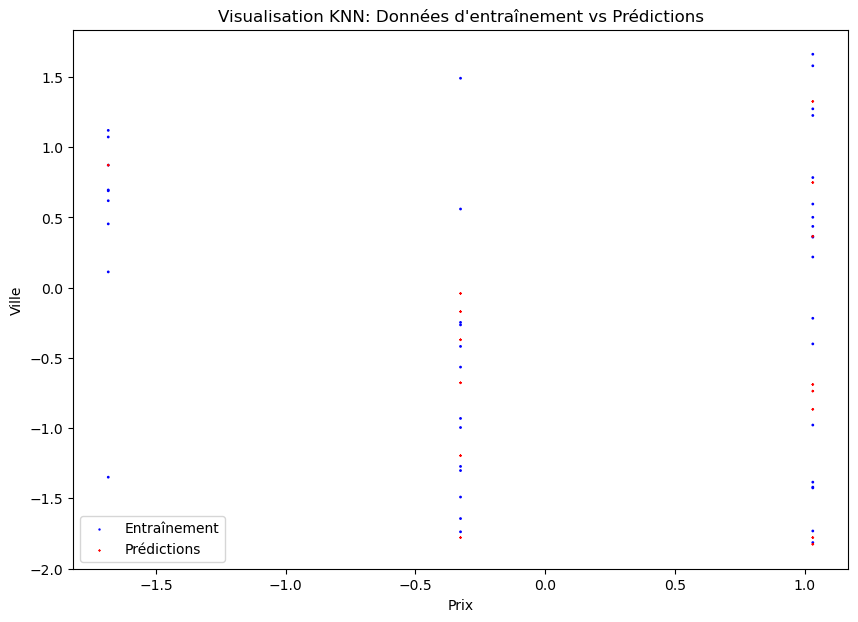

In [133]:
X = data[['city', 'price']]
y = data['balcony']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Sans balcon', 'Avec balcon']))

plt.figure(figsize=(10, 7))

plt.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', label='Entraînement')

plt.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='r', marker='x', label='Prédictions')

plt.xlabel('Prix')
plt.ylabel('Ville')
plt.legend()
plt.title('Visualisation KNN: Données d\'entraînement vs Prédictions')
plt.show()


9. D'après les derniers rapport de classification nous pouvons voir en comparant la précision, le recall et le f1-score, que c'est le KNN qui permet de mieux prédire les données fournies

10. Créer une classification avec Random Forest pour savoir si il y a un balcon en fonction du prix et de la ville

              precision    recall  f1-score   support

 Sans balcon       0.70      0.64      0.67        11
 Avec balcon       0.60      0.67      0.63         9

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



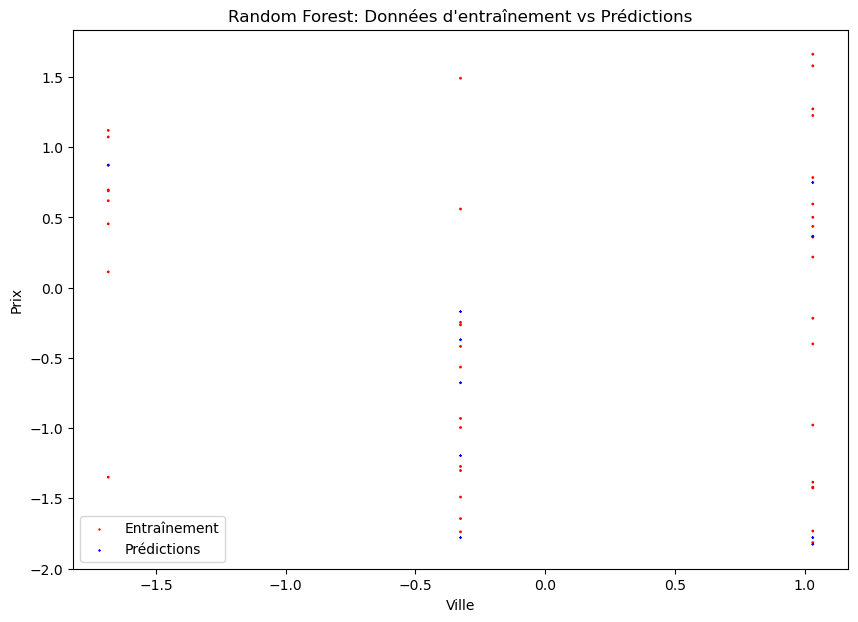

In [134]:
X = data[['city', 'price']]
y = data['balcony']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Sans balcon', 'Avec balcon']))

plt.figure(figsize=(10, 7))


plt.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', label='Entraînement')

plt.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='b', marker='x', label='Prédictions')

plt.xlabel('Ville')
plt.ylabel('Prix')
plt.title('Random Forest: Données d\'entraînement vs Prédictions')
plt.legend()
plt.show()

# Pas fait 
11. Mettre à disposition l'entraitement et la prédiction sous APIs des points 2, 3 et 4
12. Mettre en forme les prédictions dans le formulaire d'ajout d'appartement quand j'interagis avec les nouveaux champs prix, surface, ville